# Breast Cancer Histopathological(BreakHis) Image Classification using Deep Convolutional Neural Network(DCNN)

In this case study we would be using the [BreakHis](https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/) Dataset and simultaneously work as per the paper ["Using parallel pre-trained types of DCNN
model to predict breast cancer with color
normalization"](https://bmcresnotes.biomedcentral.com/counter/pdf/10.1186/s13104-021-05902-3.pdf) published on BioMed Central(BMC Research Notes).

**Dataset Info:** The Breast Cancer Histopathological Image Classification (BreakHis) is  composed of microscopic images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X). To date, it contains 2,480  benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format).

The dataset BreaKHis is divided into two main groups: 

Benign tumors and Malignant tumors. Histologically benign is a term referring to a lesion that does not match any criteria of malignancy – e.g., marked cellular atypia, mitosis, disruption of basement membranes, metastasize, etc. Normally, benign tumors are relatively “innocents”, presents slow growing and remains localized. Malignant tumor is a synonym for cancer: lesion can invade and destroy adjacent structures (locally invasive) and spread to distant sites (metastasize) to cause death.

In current version, samples present in dataset were collected by SOB method, also named partial mastectomy or excisional biopsy. This type of procedure, compared to any methods of needle biopsy, removes the larger size of tissue sample and is done in a hospital with general anesthetic.

Both breast tumors benign and malignant can be sorted into different types based on the way the tumoral cells look under the microscope. Various types/subtypes of breast tumors can have different prognoses and treatment implications. 

The dataset currently contains four histological distinct types of benign breast tumors: 
1. adenosis (A)
2. fibroadenoma (F)
3. phyllodes tumor (PT)
4. tubular adenona (TA)

Four malignant tumors (breast cancer): 
1. carcinoma (DC)
2. lobular carcinoma (LC)
3. mucinous carcinoma (MC)
4. papillary carcinoma (PC).

**Objective** - In this case study our model should be able to classify breast cancer anatomy at a microscopic level. The model generated for classifying the images into either Benign or Malignant tumor should be able to be deployed on a mobile or web application.

---

## 1. Become One with Data

We will download the data and pre-process it in a way that tensorflow is comfortable with it.

In [1]:
import os
import shutil
import random
!pip install -q split-folders[full]
import splitfolders
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, plot_model
from tensorflow.keras import layers
from tensorflow.keras import Model, mixed_precision, Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We will be downloading the data directly from [kaggle](https://www.kaggle.com/datasets/ambarish/breakhis), the same data which has been uploaded by someone.

Downloading from kaggle is much faster than any other method.

In [10]:
# Downloading the dataset
# Copying my Kaggle API in root folder
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset from kaggle and unzipping the file
!kaggle datasets download -d ambarish/breakhis -p ./data/ --unzip 

100% 3.98G/3.99G [03:23<00:00, 20.7MB/s]
100% 3.99G/3.99G [03:23<00:00, 21.0MB/s]


lets check the image directory hierarchy.

In [11]:
# function to know how many files are 
def walkthrough_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}')

In [12]:
# Benign and Malignant path
benign_path = "/content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/"
malignant_path = "/content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/"

In [13]:
# Benign walkthrough
walkthrough_dir(benign_path)

There are 1 directories and 6 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/
There are 4 directories and 0 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB
There are 3 directories and 0 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor
There are 4 directories and 0 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704
There are 0 directories and 42 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/200X
There are 0 directories and 39 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/400X
There are 0 directories and 39 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/100X
There are 0 directories and 38 files in /content/

In [14]:
# Malignant walkthrough
walkthrough_dir(malignant_path)

There are 1 directories and 6 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/
There are 4 directories and 0 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB
There are 5 directories and 0 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma
There are 4 directories and 0 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C
There are 0 directories and 30 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/200X
There are 0 directories and 29 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/400X
There are 0 directories and 35 files in /content/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570C/100X
There are 0 di

All the images are segregated in sub-folder wise, representing their magnifying factor.
We need to bring all the images into just two folders and make it a simple segregation.

In [20]:
# Creating two directories
os.mkdir("data/images")
os.mkdir("data/images/malignant")
os.mkdir("data/images/benign")

In [21]:
# function to read directory and get all images
def get_list_of_files(dir_path):
  file_list = os.listdir(dir_path)
  img_files = list()
  # walkthrough all the directories
  for dir in file_list:
    full_path = os.path.join(dir_path, dir) # create full path
    if os.path.isdir(full_path):
      img_files = img_files + get_list_of_files(full_path)
    else:
      img_files.append(full_path)
  return img_files

In [22]:
# all the files in a list
benign_files = get_list_of_files(benign_path)
malignant_files = get_list_of_files(malignant_path)
len(benign_files), len(malignant_files)

(2486, 5435)

In [23]:
# Moving only the images in thier respective class.
for i in benign_files:
  if i.endswith('.png'):
    shutil.copy(i, '/content/data/images/benign/')

for i in malignant_files:
  if i.endswith('.png'):
    shutil.copy(i, '/content/data/images/malignant/')

walkthrough_dir("/content/data/images/")

There are 2 directories and 0 files in /content/data/images/
There are 0 directories and 2480 files in /content/data/images/benign
There are 0 directories and 5429 files in /content/data/images/malignant


This is the exact no. of images mentioned by the owners of the dataset.

* Benign Images: 2480,
* Malignant Images: 5429
* Total Images: 7909

With this we have all the images in the right folder.

Now lets view random images of both the class.

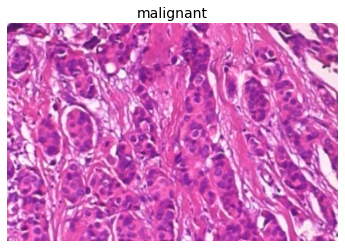

In [24]:
# Creating a function to view images
def view_random_images(target_dir, target_class):
  """
  View any random images from any directory

  Args: target_dir - Train or Test Directory.
        target_class - Class Labels.
  """
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder),1)
  img = plt.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class, size=14)
  plt.axis(False)

view_random_images('/content/data/images/', 'malignant')

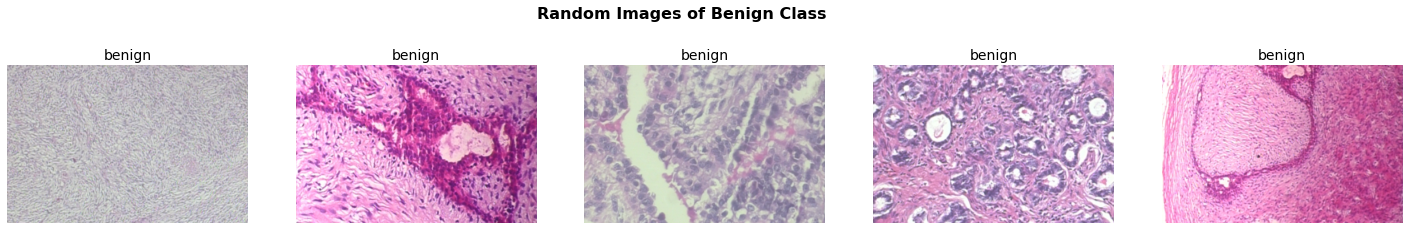

In [25]:
# view multiple random images in benign class
plt.figure(figsize=(25, 4))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  view_random_images('/content/data/images/', 'benign')
  plt.suptitle('Random Images of Benign Class', size=16, weight='bold');

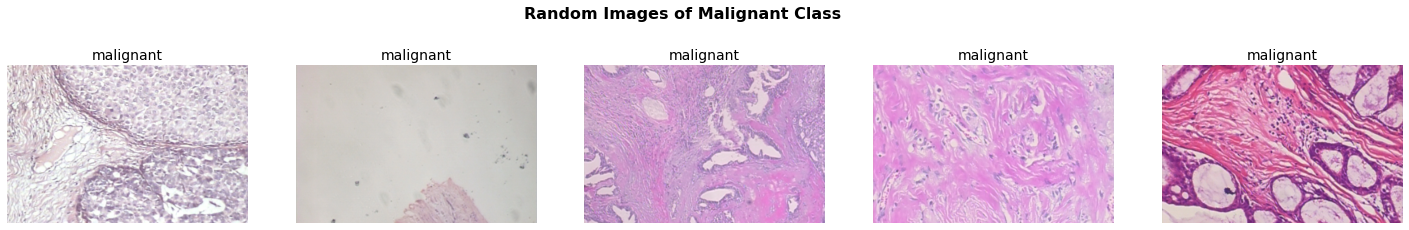

In [26]:
# now for malignant class
plt.figure(figsize=(25, 4))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  view_random_images('/content/data/images/', 'malignant')
  plt.suptitle('Random Images of Malignant Class', size=16, weight='bold');

## 2. Preparing the data

We have become one with the data, with this we can start our preprocessing stage.

In this stage we will be:
* Spliting the data into training and testing dataset
* Convert it into the format of tensorflow ```tf.data.Dataset```
* Prefetch the data
* Create global precision policy


In [27]:
# splitting the data into training and testing in 80:20 ratio
splitfolders.ratio(input='/content/data/images',
                   output='/content/data/split_images',
                   seed=42,
                   ratio=(0.8,0.2))

Copying files: 7909 files [00:42, 185.55 files/s]


In [28]:
# walkthrough of our new split directory
walkthrough_dir('/content/data/split_images')

There are 2 directories and 0 files in /content/data/split_images
There are 2 directories and 0 files in /content/data/split_images/val
There are 0 directories and 496 files in /content/data/split_images/val/benign
There are 0 directories and 1086 files in /content/data/split_images/val/malignant
There are 2 directories and 0 files in /content/data/split_images/train
There are 0 directories and 1984 files in /content/data/split_images/train/benign
There are 0 directories and 4343 files in /content/data/split_images/train/malignant


In our split images directories we have:
* Training Images
  * 1984 - Benign
  * 4343 - Malignant
* Testing Images
  * 496 - Benign
  * 1086 - Malignant

In [29]:
# creating directory variables
train_dir = '/content/data/split_images/train/'
test_dir = '/content/data/split_images/val/'

In [30]:
# creating dataset
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = image_dataset_from_directory(train_dir,
                                          label_mode='binary',
                                          seed=42,
                                          image_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode='binary',
                                         shuffle=False,
                                         image_size=IMAGE_SIZE,
                                         batch_size=BATCH_SIZE)

Found 6327 files belonging to 2 classes.
Found 1582 files belonging to 2 classes.


In [31]:
# Class names
class_names = train_data.class_names
class_names

['benign', 'malignant']

In [32]:
train_data, test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

We now have our dataset to work on and also the class name. 

Next we need to prefetch our dataset, so that this will improve the speed of allocating and preparing the next batch of data while the current batch is being used.

In [33]:
# prefetching the dataset
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [34]:
for images,labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[189.46764  154.34264  184.56306 ]
   [190.43694  149.24944  189.24944 ]
   [177.81697  129.86662  172.80412 ]
   ...
   [150.53181   98.33036  141.57645 ]
   [167.02065  118.44029  153.14453 ]
   [194.94363  152.69363  192.63113 ]]

  [[192.09988  156.86607  189.09988 ]
   [198.64676  155.91295  200.26115 ]
   [189.1635   147.45535  189.48158 ]
   ...
   [163.56752  108.56752  149.19252 ]
   [183.48381  131.26619  168.20926 ]
   [180.36607  139.99107  174.53572 ]]

  [[180.32645  143.16852  179.0625  ]
   [197.41016  154.0826   202.89565 ]
   [200.40459  159.17578  203.29019 ]
   ...
   [182.73885  128.72266  169.09598 ]
   [197.42133  144.01619  179.64119 ]
   [194.94643  150.64008  185.61719 ]]

  ...

  [[193.16113  148.26434  184.93678 ]
   [201.17787  151.0796   197.71352 ]
   [197.68112  143.13982  195.34514 ]
   ...
   [182.2901   121.2276   167.9151  ]
   [185.72218  119.987236 168.69208 ]
   [175.47617  122.10116  166.22617 ]]

  [[211.0898   163.9023   198.1523

In [35]:
# total no. of batches
len(train_data), len(test_data)

(198, 50)

We have all the data in proper folders and are splitted in 80:20 ratio.

Our training and testing dataset are in prefetch format. Now, to increase the performance of gpu to properly utilize the memory we will need to change the global precision policy to mixed_float16.

In [36]:
# setting golbal precision to mixed_float16
mixed_precision.set_global_policy(policy='mixed_float16')
mixed_precision.global_policy()

<Policy "mixed_float16">

## Creating a Baseline Model

We will now create our first model - Baseline Model.

In this model we would be using convolutional Neural Network(CNN) and the architecture will be similar to VGG-16, a CNN which won in ImageNet Classificaion Competition

In [37]:
INPUT_SHAPE = (224, 224, 3)

# Create our Baseline CNN model with functional API
inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units=128, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32, name='output_layer')(x)
model_0 = Model(inputs, outputs, name='baseline_model_0')

# Compile the model
model_0.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_0.summary()

Model: "baseline_model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                  

## Fitting a Model

Before fitting our model, we need to setup our tensorboard callback this will help in visualizing our model performance.

In [38]:
# creating tensorboard callback
def tensorboard_callbacks(dir_name, exp_name):
  """
  Creates a TensorBoard callback instance to store log files.
    
  Stores log files with the filepath:
  "dir_name/experiment_name/current_datetime/"
    
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. model_1)
  """
  log_dir = dir_name + '/' + exp_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H:%M:%S')
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving the log of Tensorboard Callback in directory: {log_dir}')
  return tb_callback

In [39]:
#Fitting our model with our dataset
history_0_baseline = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=len(test_data),
                                 callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'baseline_model_0')])

Saving the log of Tensorboard Callback in directory: tensorboard_callbacks/baseline_model_0/20230127-08:51:43
Epoch 1/5
198/198 [==============================] - 101s 426ms/step - loss: 24.6811 - accuracy: 0.6703 - val_loss: 0.5376 - val_accuracy: 0.6865
Epoch 2/5
198/198 [==============================] - 81s 401ms/step - loss: 0.5047 - accuracy: 0.7715 - val_loss: 0.5280 - val_accuracy: 0.7326
Epoch 3/5
198/198 [==============================] - 67s 325ms/step - loss: 0.4731 - accuracy: 0.8013 - val_loss: 0.4781 - val_accuracy: 0.8047
Epoch 4/5
198/198 [==============================] - 66s 322ms/step - loss: 0.4594 - accuracy: 0.8099 - val_loss: 0.4899 - val_accuracy: 0.7933
Epoch 5/5
198/198 [==============================] - 66s 322ms/step - loss: 0.4648 - accuracy: 0.8046 - val_loss: 0.4563 - val_accuracy: 0.8211


## Evaluating a Model

In [40]:
# Evaluating our model
model_0.evaluate(test_data)

50/50 [==============================] - 13s 254ms/step - loss: 0.4563 - accuracy: 0.8211


[0.45631352066993713, 0.8211125135421753]

Our model_0 - Baseline model has ran successfully with an accuracy of approx 80%+. 

Now lets visualize the performance of our baseline model.

In [41]:
# Creating a function for loss and accuracy curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
    
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(loss))
  plt.figure(figsize=(15,5))

  # Loss Plot 
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='Loss')
  plt.plot(epochs, val_loss, label='Val_Loss')
  plt.title('Loss', weight='bold')
  plt.xlabel('Epochs')
  plt.legend();

  # Accuracy Plot
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='Accuracy')
  plt.plot(epochs, val_accuracy, label='Val_Accuracy')
  plt.title('Accuracy', weight='bold')
  plt.xlabel('Epochs')
  plt.legend();

  plt.suptitle('Loss and Accuracy Curves per Epoch of Model\n', size=14, weight='bold')

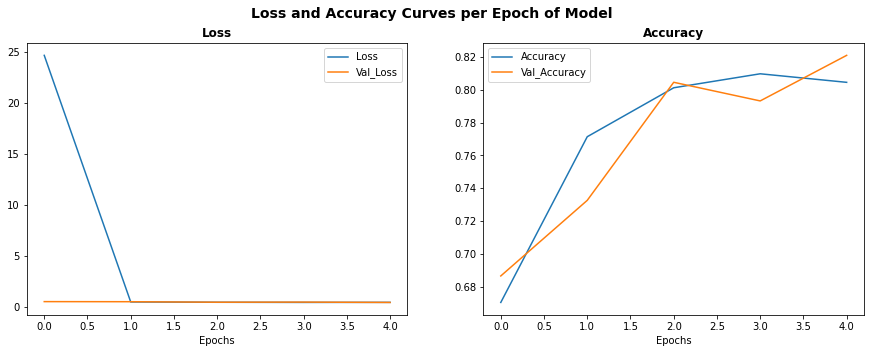

In [42]:
# ploting our  model fit data
plot_loss_curves(history_0_baseline)

## Improving the Model

Now that we have created our Baseline model and ran it for 5 epochs, we have got a loss of 0.4 and accuracy of 0.8.

Time for some improvement in our model. In this model we will be adding Data Augmentation. 

Similar to the paper, we will be augmenting our data and applying it in the baseline model.

In [43]:
# Creating our data augmentation model
data_augmentation = Sequential([
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomFlip()
], name='data_augmentation')  

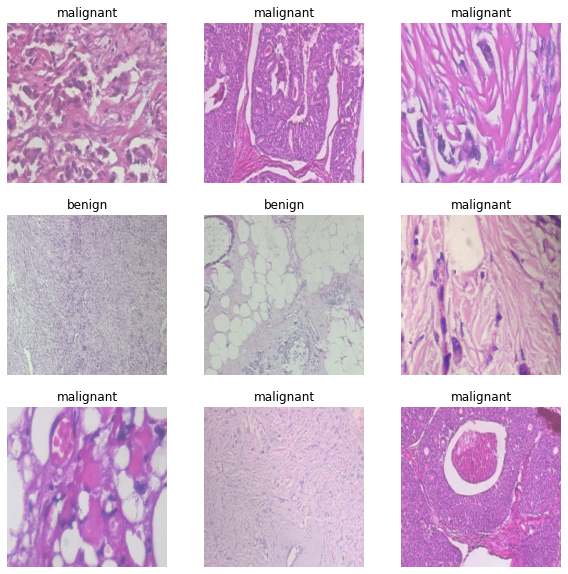

In [44]:
# Plotting images without any augmentation
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1),
  plt.imshow(images[i]/255.)
  plt.title(class_names[tf.cast(labels[i][0].numpy(), tf.int32)])
  plt.axis(False);            

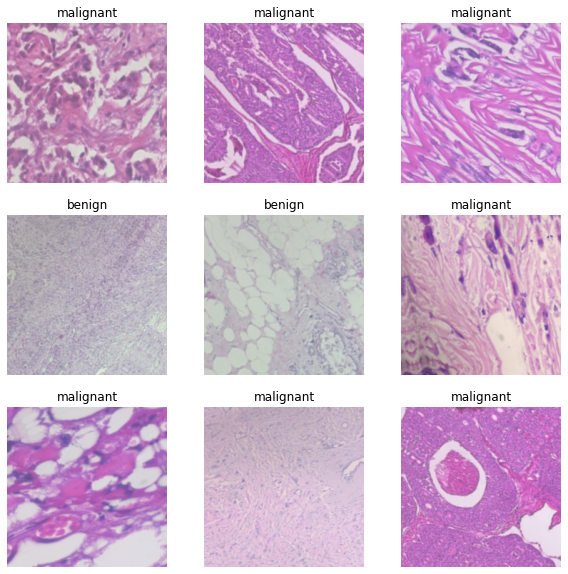

In [45]:
# Plotting images with data augmentation model
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1),
  img = tf.expand_dims(images[i]/255., 0)
  aug_img = tf.cast(data_augmentation(img), tf.float32)
  plt.imshow(aug_img[0])
  plt.title(class_names[tf.cast(labels[i][0].numpy(), tf.int32)])
  plt.axis(False);    

In [46]:
# Creating a similar model as before with data augmentation
inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(units=128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32, name='output_layer')(x)
model_1 = Model(inputs, outputs, name='data_aug_model_1')

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

Model: "data_aug_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 112, 112, 32) 

In [47]:
# Fitting the model
history_1_base_aug = model_1.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=len(test_data),
                                 callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'model_1_base_aug')])

Saving the log of Tensorboard Callback in directory: tensorboard_callbacks/model_1_base_aug/20230127-08:59:42
Epoch 1/5
198/198 [==============================] - 74s 355ms/step - loss: 52.6083 - accuracy: 0.6787 - val_loss: 0.6805 - val_accuracy: 0.6865
Epoch 2/5
198/198 [==============================] - 71s 346ms/step - loss: 0.6492 - accuracy: 0.6864 - val_loss: 0.6234 - val_accuracy: 0.6865
Epoch 3/5
198/198 [==============================] - 71s 346ms/step - loss: 0.6012 - accuracy: 0.6864 - val_loss: 0.5543 - val_accuracy: 0.6865
Epoch 4/5
198/198 [==============================] - 79s 386ms/step - loss: 0.5240 - accuracy: 0.7261 - val_loss: 0.5125 - val_accuracy: 0.8066
Epoch 5/5
198/198 [==============================] - 71s 346ms/step - loss: 0.5082 - accuracy: 0.7770 - val_loss: 0.4691 - val_accuracy: 0.8186


50/50 [==============================] - 13s 256ms/step - loss: 0.4691 - accuracy: 0.8186


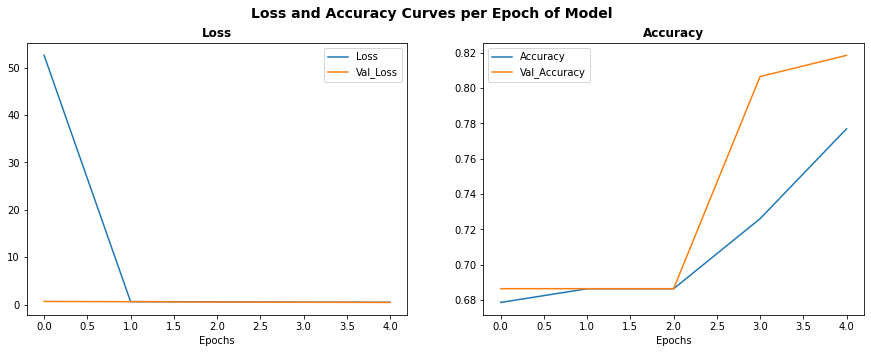

In [48]:
# Evaluating our model_1
model_1.evaluate(test_data)

# Ploting our  model_1 fit data
plot_loss_curves(history_1_base_aug)

Data augmentation is showing good result but there is a drop in accuracy compare to our baseline still the movement of the plot is in right direction.

## Feature Extraction

We have created our baseline model and also applied data augmentation to the data.

Now, we will move onto the architecture that the [paper](https://bmcresnotes.biomedcentral.com/counter/pdf/10.1186/s13104-021-05902-3.pdf) introduces to us.

The proposed model architecture contains -
1. A Input layer
2. A feature extraction layers of three different CNN architecture
  * Xception Model
  * NasNet Model
  * Inception Resnet V2 Model
3. A GlobalAveragePooling2d layer for all 3 model
4. A Concatenate layer
5. A Dropout layer
6. A Dense layer which is the output layer.

Before creating the model, we need to initate the feature extraction models and some of the callbacks.

In [56]:
# Creating model checkpoint, early stopping and learning rate reduction callbacks
# Model Checkpoint
checkpoint_path = "model_checkpoint/checkpoint.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3)

# Learning Rate Reduction
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                         factor=0.2,
                                                         patience=2,
                                                         verbose=1,
                                                         min_lr=1e-7)

In [57]:
# Loading the core models for this architecture
# Xception Model
base_xception_model = tf.keras.applications.xception.Xception(include_top=False, input_shape=INPUT_SHAPE)
base_xception_model.trainable = False

# NasNet Model
base_nasnet_model = tf.keras.applications.nasnet.NASNetMobile(include_top=False, input_shape=INPUT_SHAPE)
base_nasnet_model.trainable = False

# Inception ResNet V2 Model
base_inceptionresnetv2_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, input_shape=INPUT_SHAPE)
base_inceptionresnetv2_model.trainable = False

In [58]:
# Setting up model
# 1. Input Layer
inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')

# 2.1 Feature Extraction Layer - Xception 
xception_preprocess = tf.keras.applications.xception.preprocess_input(inputs)
xception_core = base_xception_model(xception_preprocess)

# 2.2 Feature Extraction Layer - NasNet
nasnet_preprocess = tf.keras.applications.nasnet.preprocess_input(inputs)
nasnet_core = base_nasnet_model(nasnet_preprocess)

# 2.3 Feature Extraction Layer - Inception ResNet V2
inceptionresnetv2_preprocess = tf.keras.applications.inception_resnet_v2.preprocess_input(inputs)
inceptionresnetv2_core = base_inceptionresnetv2_model(inceptionresnetv2_preprocess)

# 3 GlobalAveragePooling2D Layer
global_pool_xception = layers.GlobalAveragePooling2D(name='Xception_GAP2d')(xception_core)
global_pool_nasnet = layers.GlobalAveragePooling2D(name='nasnet_GAP2d')(nasnet_core)
global_pool_inceptionresnetv2 = layers.GlobalAveragePooling2D(name='inceptionresnetv2_GAP2d')(inceptionresnetv2_core)

# 4 Concatenate Layer
core_concat = layers.Concatenate(name='core_model_concat')([global_pool_xception, 
                                                            global_pool_nasnet, 
                                                            global_pool_inceptionresnetv2])

# 5 Dropout Layer
dropout = layers.Dropout(0.1)(core_concat)

# 6 Dense Layer and Model
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32, name='output_layer')(dropout)
model_2 = Model(inputs, outputs, name='dcnn_3core_model_2')

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# Model summary
model_2.summary()

Model: "dcnn_3core_model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.math.truediv_3 (TFOpLambda)  (None, 224, 224, 3)  0          ['input_layer[0][0]']            
                                                                                                  
 tf.math.truediv_4 (TFOpLambda)  (None, 224, 224, 3)  0          ['input_layer[0][0]']            
                                                                                                  
 tf.math.truediv_5 (TFOpLambda)  (None, 224, 224, 3)  0          ['input_layer[0]

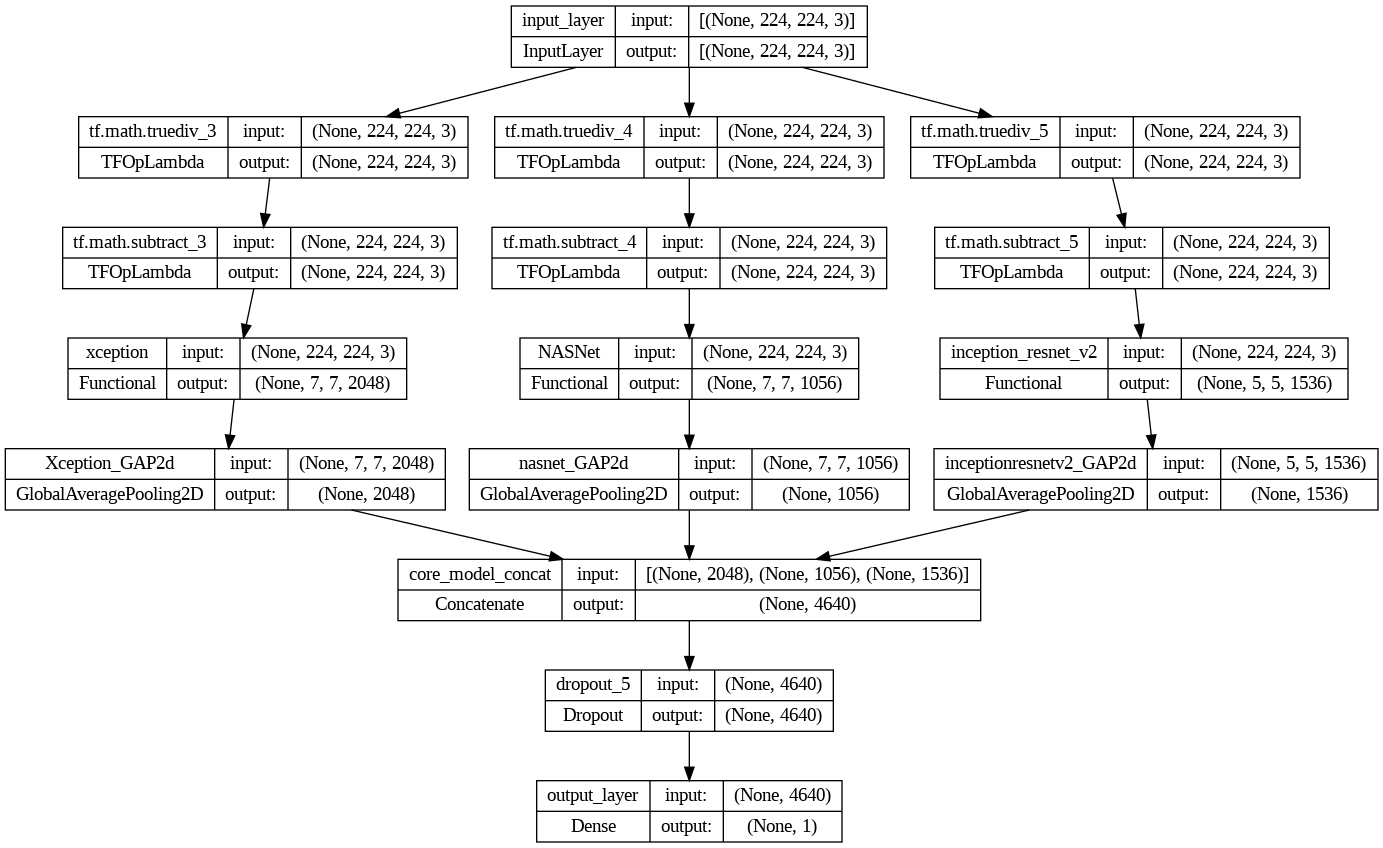

In [59]:
# Plotting the model
plot_model(model_2, show_shapes=True)

In [60]:
# Fit the model
history_2_dcnn_3core = model_2.fit(train_data,
                                   epochs=50,
                                   steps_per_epoch=len(train_data),
                                   validation_data=test_data,
                                   validation_steps=len(test_data),
                                   callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'model_2_dcnn_3core'),
                                              model_checkpoint,
                                              early_stopping,
                                              reduce_lr_plateau])

Saving the log of Tensorboard Callback in directory: tensorboard_callbacks/model_2_dcnn_3core/20230127-09:11:34
Epoch 1/50
198/198 [==============================] - ETA: 0s - loss: 0.5962 - accuracy: 0.7187
Epoch 1: val_accuracy improved from -inf to 0.78192, saving model to model_checkpoint/checkpoint.ckpt
198/198 [==============================] - 119s 452ms/step - loss: 0.5962 - accuracy: 0.7187 - val_loss: 0.5394 - val_accuracy: 0.7819 - lr: 1.0000e-04
Epoch 2/50
198/198 [==============================] - ETA: 0s - loss: 0.5037 - accuracy: 0.8124
Epoch 2: val_accuracy improved from 0.78192 to 0.82364, saving model to model_checkpoint/checkpoint.ckpt
198/198 [==============================] - 82s 403ms/step - loss: 0.5037 - accuracy: 0.8124 - val_loss: 0.4909 - val_accuracy: 0.8236 - lr: 1.0000e-04
Epoch 3/50
198/198 [==============================] - ETA: 0s - loss: 0.4668 - accuracy: 0.8367
Epoch 3: val_accuracy improved from 0.82364 to 0.83818, saving model to model_checkpoint/c

50/50 [==============================] - 16s 305ms/step - loss: 0.3514 - accuracy: 0.9159


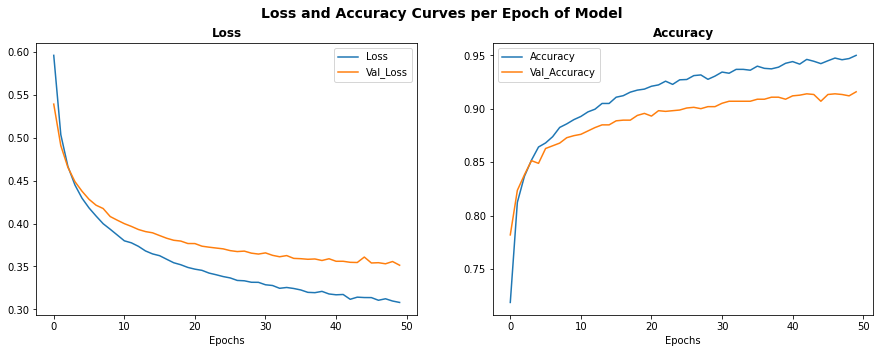

In [61]:
# Evaluating our model_2
model_2.evaluate(test_data)

# Ploting our  model_2 fit data
plot_loss_curves(history_2_dcnn_3core)

Running parallel pre-trained architecture has shown good result going 90%+ accuracy but the plot is indicating that there is an overfitting.

Lets run the same model using data augmentation.

## Feature Extraction with Data Augmentation

Model architecture will be same as before just adding the data augmentation sequential model before the pre-trained models.

In [62]:
# Initiating new checkpoint
checkpoint_path_data_aug = "model_checkpoint/checkpoint_data_aug.ckpt"
model_checkpoint_data_aug = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_data_aug,
                                                               monitor='val_accuracy',
                                                               save_best_only=True,
                                                               save_weights_only=True,
                                                               verbose=1)

In [63]:
# Creating our data aug model (model similar to the above)

inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')
data_aug = data_augmentation(inputs) # data augmentation model
xception_preprocess = tf.keras.applications.xception.preprocess_input(data_aug)
xception_core = base_xception_model(xception_preprocess) # xception core model
nasnet_preprocess = tf.keras.applications.nasnet.preprocess_input(data_aug)
nasnet_core = base_nasnet_model(nasnet_preprocess) # nasnet core model
inceptionresnetv2_preprocess = tf.keras.applications.inception_resnet_v2.preprocess_input(data_aug)
inceptionresnetv2_core = base_inceptionresnetv2_model(inceptionresnetv2_preprocess) # inception_resnet_v2 core model
global_pool_xception = layers.GlobalAveragePooling2D(name='Xception_GAP2d')(xception_core) 
global_pool_nasnet = layers.GlobalAveragePooling2D(name='nasnet_GAP2d')(nasnet_core)
global_pool_inceptionresnetv2 = layers.GlobalAveragePooling2D(name='inceptionresnetv2_GAP2d')(inceptionresnetv2_core)
core_concat = layers.Concatenate(name='core_model_concat')([global_pool_xception, 
                                                            global_pool_nasnet, 
                                                            global_pool_inceptionresnetv2]) # Concat layer for all three core models
dropout = layers.Dropout(0.1)(core_concat)
outputs = layers.Dense(1, activation='sigmoid', dtype=tf.float32, name='output_layer')(dropout)
model_3 = Model(inputs, outputs, name='dcnn_dataaug_3core_model_3')

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# Model summary
model_3.summary()

Model: "dcnn_dataaug_3core_model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  0          ['input_layer[0][0]']            
                                                                                                  
 tf.math.truediv_6 (TFOpLambda)  (None, 224, 224, 3)  0          ['data_augmentation[1][0]']      
                                                                                                  
 tf.math.truediv_7 (TFOpLambda)  (None, 224, 224, 3)  0          ['data_a

In [64]:
# checking which layers are trainable?
for layer in model_3.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
tf.math.truediv_6 True
tf.math.truediv_7 True
tf.math.truediv_8 True
tf.math.subtract_6 True
tf.math.subtract_7 True
tf.math.subtract_8 True
xception False
NASNet False
inception_resnet_v2 False
Xception_GAP2d True
nasnet_GAP2d True
inceptionresnetv2_GAP2d True
core_model_concat True
dropout_6 True
output_layer True


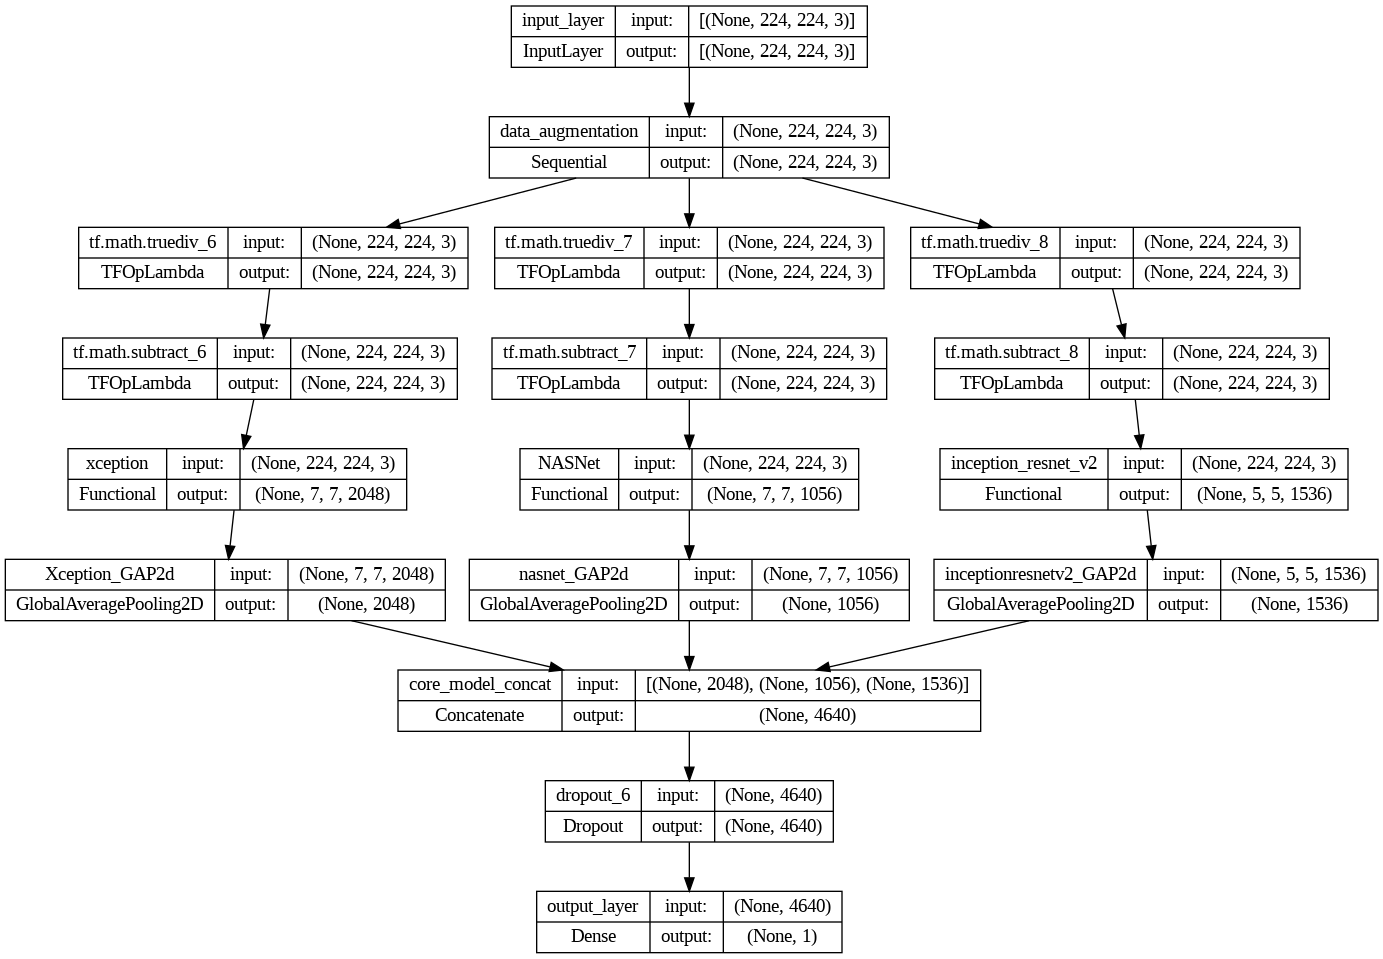

In [65]:
# Ploting data augmentation model_3
plot_model(model_3, show_shapes=True)

In [66]:
# Fit the model
history_3_dcnn_dataaug_3core = model_3.fit(train_data,
                                           epochs=50,
                                           steps_per_epoch=len(train_data),
                                           validation_data=test_data,
                                           validation_steps=len(test_data),
                                           callbacks=[tensorboard_callbacks('tensorboard_callbacks', 'model_3_dcnn_dataaug_3core'),
                                                      model_checkpoint_data_aug,
                                                      early_stopping,
                                                      reduce_lr_plateau])

Saving the log of Tensorboard Callback in directory: tensorboard_callbacks/model_3_dcnn_dataaug_3core/20230127-10:26:27
Epoch 1/50
198/198 [==============================] - ETA: 0s - loss: 0.5733 - accuracy: 0.7304
Epoch 1: val_accuracy improved from -inf to 0.78951, saving model to model_checkpoint/checkpoint_data_aug.ckpt
198/198 [==============================] - 124s 475ms/step - loss: 0.5733 - accuracy: 0.7304 - val_loss: 0.5271 - val_accuracy: 0.7895 - lr: 1.0000e-04
Epoch 2/50
198/198 [==============================] - ETA: 0s - loss: 0.5064 - accuracy: 0.8001
Epoch 2: val_accuracy improved from 0.78951 to 0.81795, saving model to model_checkpoint/checkpoint_data_aug.ckpt
198/198 [==============================] - 87s 429ms/step - loss: 0.5064 - accuracy: 0.8001 - val_loss: 0.4867 - val_accuracy: 0.8180 - lr: 1.0000e-04
Epoch 3/50
198/198 [==============================] - ETA: 0s - loss: 0.4744 - accuracy: 0.8282
Epoch 3: val_accuracy improved from 0.81795 to 0.83186, saving m

50/50 [==============================] - 15s 302ms/step - loss: 0.3780 - accuracy: 0.8995


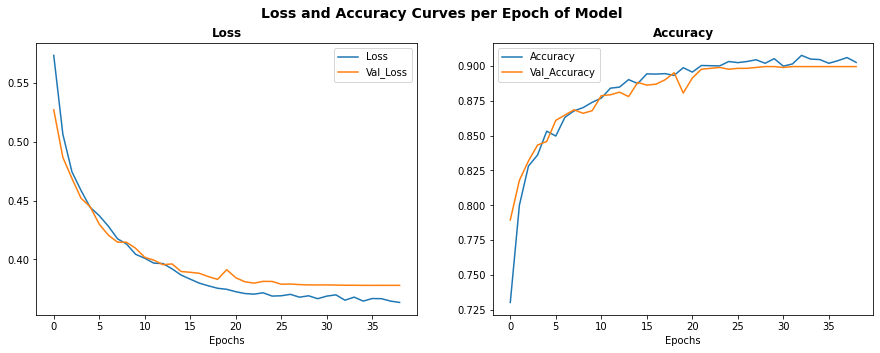

In [67]:
# Evaluating our model_3
model_loss, model_accuracy = model_3.evaluate(test_data)

# Ploting our  model_3 fit data
plot_loss_curves(history_3_dcnn_dataaug_3core)

Great, both the models have shown good results, the models with and without data augmentation have shown similar results.

In the model without data augmentation, we can see that the model took longer time to train compare to the model with  data augmentation which has shown similar results in less time.

Even the loss and accuracy curves of the data augmentation model are showing great results, the overfitting has decreased quite a lot both the training and validation curves are close to each other. 

In [ ]:
# Making predictions of the test data
pred_probs = model_3.predict(test_data, verbose=1)
pred_probs[:20]

## Evaluating the Model Predictions

Now, that our model is running and giving us a good prediction. It's time to check the extend of the model's prediction probability. 

First, we will try to understand the error rate of our prediction. 
for this we will be using the confusion matrix which will indicate the error rate in a form of True Positive and Negative, and False Positive and Negative.

In [69]:
# getting the classes of all the prediction
pred_classes = tf.cast(tf.squeeze(tf.math.round(pred_probs), axis=1),tf.int32)
pred_classes[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int32)>

In [ ]:
# original true labels
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(tf.cast(labels[0], tf.int32).numpy())
y_labels[:20]

In [71]:
len(pred_probs), len(pred_classes), len(y_labels)

(1582, 1582, 1582)

In [72]:
# Getting the accuracy score using scikit-learn, its similar to the tensorflow accuracy metrics
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy, model_accuracy

(0.8994943109987358, 0.8994942903518677)

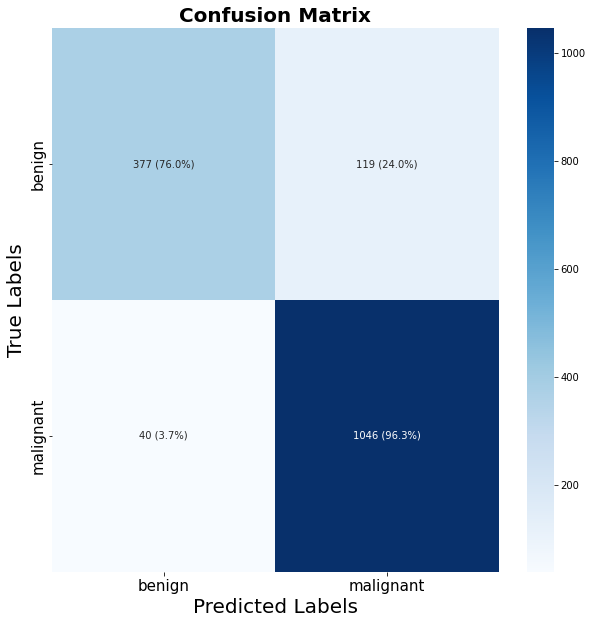

In [73]:
# Using Confusion Matrix from scikit learn and plotting it in a heatmap.
cm = confusion_matrix(y_true = y_labels, y_pred = pred_classes)

count = ['{0:0.0f}'.format(i) for i in cm.flatten()]
percent = ['{0:.1%}'.format(i) for i in (cm/cm.sum(axis=1).reshape(2,1)).flatten()]
labels = [f'{count} ({percent})' for count, percent in zip(count, percent)]
labels = np.asarray(labels).reshape(2, 2)

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix', fontsize=20, weight='bold')
ax.set_xlabel('Predicted Labels', fontsize=20)
ax.set_xticklabels(class_names, fontsize=15)
ax.set_ylabel('True Labels', fontsize=20)
ax.set_yticklabels(class_names, fontsize=15);

We can clearly see the error rate and how well the model is predicting both of the classes.

Both Benign and Malignant are showing maximum numbers which shows that results are good and the model is producing almost accurate results.

We can also see that the model is struggling with benign images, this might be with the difference in the total number of images that are trained.

Next, we will go into much more detail and also vizualize the images that are classified wrong by the model.

In [74]:
# Creating classification report using scikit learn.
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.9040767386091128,
  'recall': 0.7600806451612904,
  'f1-score': 0.8258488499452356,
  'support': 496},
 '1': {'precision': 0.8978540772532189,
  'recall': 0.9631675874769797,
  'f1-score': 0.9293647267880942,
  'support': 1086},
 'accuracy': 0.8994943109987358,
 'macro avg': {'precision': 0.9009654079311658,
  'recall': 0.861624116319135,
  'f1-score': 0.877606788366665,
  'support': 1582},
 'weighted avg': {'precision': 0.8998050507251047,
  'recall': 0.8994943109987358,
  'f1-score': 0.8969096857551878,
  'support': 1582}}

In [107]:
# Creating a dictionary with all the scores
class_f1_scores = {}
class_precision_scores = {}
class_recall_scores = {}
for k,v in classification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']*100
    class_precision_scores[class_names[int(k)]] = v['precision']*100
    class_recall_scores[class_names[int(k)]] = v['recall']*100
    
class_f1_scores, class_precision_scores, class_recall_scores

({'benign': 82.58488499452355, 'malignant': 92.93647267880942},
 {'benign': 90.40767386091127, 'malignant': 89.78540772532189},
 {'benign': 76.00806451612904, 'malignant': 96.31675874769797})

In [109]:
# Create a dataframe using the Scores
scores_df = pd.DataFrame({'class_name':list(class_f1_scores.keys()),
                             'f1_score': list(class_f1_scores.values()),
                             'precision': list(class_precision_scores.values()),
                             'recall': list(class_recall_scores.values())})
scores_df

,class_name,f1_score,precision,recall
0,benign,82.584885,90.407674,76.008065
1,malignant,92.936473,89.785408,96.316759


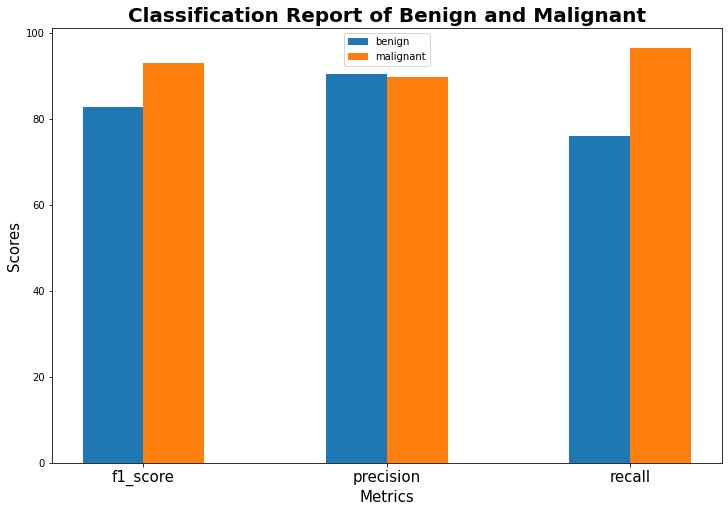

In [113]:
# Visualizing the dataframe in a horizontal bar chart.
fig,ax = plt.subplots(figsize=(12,8))
n = np.arange(len(scores_df.columns[1:]))
width = 0.25

plt.bar(n, scores_df.iloc[0,1:].values, width=width, label=scores_df.class_name[0])
plt.bar(n + width, scores_df.iloc[1,1:].values, width=width, label=scores_df.class_name[1])
plt.xlabel('Metrics', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Classification Report of Benign and Malignant', fontsize=20, weight='bold')
plt.xticks(n + width/2, scores_df.columns[1:], fontsize=15)
plt.legend();

In the bar plot we can see that the F1 scores are representing similar indication we got from the confusion matrix.

While the precision metrics indicate that both the Benign and Malignant will give correct answer 90% of the time and recall metrics indicate that Malignant was predicted correct most of the time on the other hand Benign was incorrectly predicted. 

## Conclusion

In this project, we were able to learn about the Breast Cancer with the help of the dataset and the paper on parallel pre-training DCNN. 

We were able to get a good look in creating a neural architecture that uses three pre-trained deep neural networks, concatenating them and improving the training of the model.

The model is quite capable in producing results and classifying Benign and Malignant cancer cells, still there is a error rate of 18% for Benign and 8% for Malignant, overall the model was able to achieve a accuracy of 90% with and without augmentation.

We can improve the result by experimenting with the parameters and changing the learning rate using a scheduler and we can also use a state of the art color augmentation and stain normalization method, Regular augmentation do not help with the overfitting of the model.